In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.method as mem 
import numpy as np

###  列联表    
**contingency_table_yesorno(ob, fo, grade_list=[1e-30] save_path=None)**  
以矩阵形式返回列联表。  
一分为二的预测说：“是的，将会发生一个事件”，或者“否，该事件不会发生”。雨雾预报是是/否预报的常见示例。对于某些应用，可以指定阈值以分隔“是”和“否”，例如，风速大于50节。

为了验证这种类型的预测，我们从列联表开始，该表显示“是”和“否”的预测和出现的频率（样本数）。预测（是或否）和观测值（是或否）的四种组合称为联合分布：

     命中-事件预测发生，并且确实发生了
     漏报-事件预测未发生，但确实发生了
     空报-发生事件预测，但未发生
     正确的否定-事件预测不会发生，也不会发生

列联表的左下方给出了观测和预测的发生与未发生的总数，称为边际分布。  


**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据。  
 save_path: 如果该参数不为None,则混淆矩阵将会以excel文件形式保存到指定目录  
 return: 内容为多个等级对应的列联表构成的三维数组，shape = (len(grade_list),3,3)   
**调用示例：**  

In [2]:
ob = np.random.randn(2,10)
fo = np.random.randn(2,10)
ob[ob < 0] = 0
fo[fo < 0] = 0
grade_list = [0.1,1]

In [3]:
ob

array([[0.39837636, 0.12534204, 0.        , 0.08070061, 0.        ,
        0.        , 0.        , 0.        , 0.6109008 , 0.83177783],
       [0.        , 0.        , 0.14390055, 0.        , 0.        ,
        0.        , 0.2921023 , 0.        , 0.48598901, 0.49871027]])

In [4]:
fo

array([[0.        , 1.23976035, 0.99342694, 0.        , 0.        ,
        0.        , 0.80765618, 0.55928826, 0.        , 0.        ],
       [0.        , 0.        , 0.22444287, 0.        , 0.        ,
        1.35832297, 0.22573502, 0.21147856, 0.        , 0.        ]])

In [5]:
mem.contingency_table_yesorno(ob,fo,save_path = r"H:\test_data\output\method\yes_or_no\table\ct1.xlsx")

列联表已以excel表格形式保存至H:\test_data\output\method\yes_or_no\table\ct1.xlsx


array([[[ 6,  6, 12],
        [ 5,  3,  8],
        [11,  9, 20]]], dtype=int64)

在上述示例中，由于没有设置grade_list,所以默认>0作为正样本判据，返回结果是1×3×3的数组，以下是上述运行结果excel表格的截图：  
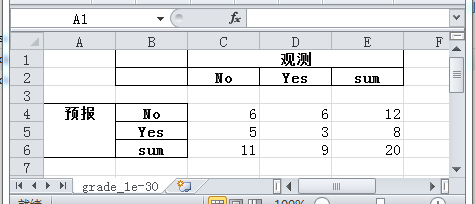

In [6]:
mem.contingency_table_yesorno(ob,fo,grade_list,save_path = r"H:\test_data\output\method\yes_or_no\table\ct2.xlsx")

列联表已以excel表格形式保存至H:\test_data\output\method\yes_or_no\table\ct2.xlsx


array([[[ 7,  5, 12],
        [ 5,  3,  8],
        [12,  8, 20]],

       [[18,  0, 18],
        [ 2,  0,  2],
        [20,  0, 20]]], dtype=int64)

在上述示例中，由于grade_list 包含两个等级，返回结果是2×3×3的数组。其保存至excel表中的结果以多个sheet显示：
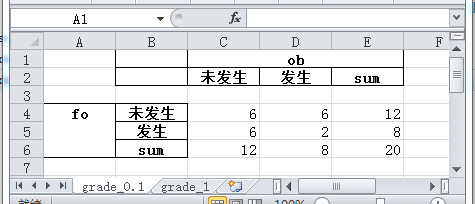